# 07. bonniema/salary-predictor

## Predictions with ML Regression Models - salary_final_done.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names

In [2]:
df = pd.read_csv('07_salary_final_done.csv')
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [3]:
# First 5 rows of the dataset
df.head()

,Title,Company,Link,Review,Salary,Description,Location2,Rate_by,low,high,...,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,combined_text,Salary_Bins
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,"2021048 Data Scientist $215,000.00 Position Re...",5
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science/Data Analyst Cost Readiness Analy...,1
2,Data Science Intern,MilliporeSigma,https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA",Hourly,$20,$25 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science Intern Job Title: Data Science In...,0
3,Jr. Data Scientist,Numero Data LLC,https://www.indeed.com/company/Numero-Data-LLC...,None,"$70,000 - $85,000 a year",Ideal candidate should have a degree in a quan...,"Arlington, VA",Yearly,"$70,000","$85,000 a year",...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Jr. Data Scientist Ideal candidate should have...,2
4,Business Data Quality Engineer,HRU Technical Resources,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$45 - $55 an hour,Please note that this is not a corp to corp or...,"Arlington, VA",Hourly,$45,$55 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Business Data Quality Engineer Please note tha...,3


In [4]:
# All columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Title                           963 non-null    object 
 1   Company                         963 non-null    object 
 2   Link                            963 non-null    object 
 3   Review                          963 non-null    object 
 4   Salary                          963 non-null    object 
 5   Description                     963 non-null    object 
 6   Location2                       958 non-null    object 
 7   Rate_by                         963 non-null    object 
 8   low                             963 non-null    object 
 9   high                            762 non-null    object 
 10  min                             963 non-null    float64
 11  max                             963 non-null    float64
 12  adjusted_salary                 963 

In [5]:
# Get statistical info about numerical columns
df.describe()

,min,max,adjusted_salary,adjusted_yearly_salary,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Salary_Bins
count,963.000000,963.000000,963.000000,963.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,963.000000
mean,61670.441516,64296.993645,70584.627643,99319.570197,19.259798,81.594503,71.971462,76.992006,77.327358,81.964463,125.306669,2.424714
std,57509.344017,73286.336815,64832.741800,50092.871055,16.279706,8.871761,24.608875,15.811719,10.551968,9.333852,15.721412,1.629156
min,7.250000,0.000000,7.250000,10000.000000,1.000000,63.820000,35.860000,51.770000,56.680000,63.390000,100.000000,0.000000
25%,55.000000,25.000000,60.000000,62498.000000,7.000000,76.550000,49.420000,63.550000,71.230000,76.670000,112.820000,1.000000
50%,60000.000000,55200.000000,70000.000000,90000.000000,16.000000,80.159143,65.700000,74.800000,76.886286,79.980000,130.330000,2.000000
75%,95000.000000,113154.000000,112500.000000,126030.500000,30.000000,87.740000,83.340000,83.170000,86.440000,87.480000,135.900000,4.000000
max,300000.000000,500000.000000,362500.000000,362500.000000,74.000000,100.000000,115.580000,103.020000,100.000000,100.000000,155.300000,5.000000


## Preprocessing

In [6]:
titles_sorted = np.array(df['Title'].sort_values())
for i in range(0,30):
    print(i, '->', titles_sorted[i])

0 -> (Part-Time) Behavior Technician - ABA Therapy
1 -> 1052 Business Analyst:Epic Inpatient Clinical Documentation
2 -> 1053 Business Analyst Epic Willow
3 -> 11637- IT- Business Analyst - Senior
4 -> 11749-IT- Business Analyst - Senior
5 -> 122 HEALTHCARE ANALYTICS - Senior Business Intelligence Anal...
6 -> 2020 ONLINE SUMMER CONSUMER MARKETING INTERNSHIP (UNPAID)
7 -> 2021048 Data Scientist $215,000.00
8 -> 2021048 Data Scientist $215,000.00
9 -> 2021049 Data Scientist $100,000.00
10 -> 2nd Shift Metrology/Quality Technician
11 -> 342-1 Business Analyst IV (Insurance)
12 -> 3PL Business Development & Sales Manager
13 -> 6th Grade Science Teacher
14 -> 9976 Technology Expert 1 - Epic willow Business Analyst
15 -> ABA Therapist
16 -> ABA/Behavioral Therapist - FT
17 -> AI / Machine Learning Engineer
18 -> AML - Data Remediation Analyst
19 -> AVP - Workday Lead / Project Manager
20 -> AWS/ Machine Learning Engineer
21 -> Account Executive
22 -> Account Manager - Customer Success Team


In [7]:
# Check the occurrence of words for each available title, store them as binary and count their amounts
title_biz_anly = [];  cnt_biz_anly = 0;    title_data_sci = [];  cnt_data_sci = 0;
title_mac_learn = [];  cnt_mac_learn = 0;   title_data_eng = [];  cnt_data_eng = 0;
title_data_anly = [];  cnt_data_anly = 0;   title_mrkt = [];  cnt_mrkt = 0;
title_soft_eng = [];  cnt_soft_eng = 0;
for title in df['Title'].str.lower():
    if 'business analyst' in title or 'business intelligence' in title or 'business systems analyst' in title:
        title_biz_anly.append(1);  cnt_biz_anly += 1
    else:  title_biz_anly.append(0)
    if 'data scientist' in title or 'data science' in title:
        title_data_sci.append(1);  cnt_data_sci += 1
    else:  title_data_sci.append(0)
    if 'machine learning' in title:
        title_mac_learn.append(1);  cnt_mac_learn += 1
    else:  title_mac_learn.append(0)
    if 'data engineer' in title or 'data center engineer' in title:
        title_data_eng.append(1);  cnt_data_eng += 1
    else:  title_data_eng.append(0)
    if 'data analyst' in title or 'data warehouse' in title:
        title_data_anly.append(1);  cnt_data_anly += 1
    else:  title_data_anly.append(0)
    if 'digital market' in title or 'marketing' in title:
        title_mrkt.append(1);  cnt_mrkt += 1
    else:  title_mrkt.append(0)
    if 'software' in title:
        title_soft_eng.append(1);  cnt_soft_eng += 1
    else:  title_soft_eng.append(0)
titles_bin = {'title_biz_anly': title_biz_anly, 'title_data_sci': title_data_sci, 'title_mac_learn': title_mac_learn,
              'title_data_eng': title_data_eng, 'title_data_anly': title_data_anly, 'title_mrkt': title_mrkt,
              'title_soft_eng': title_soft_eng}
df_titles_bin = pd.DataFrame(titles_bin)
print("#### TITLE COUNTS ####")
print(cnt_biz_anly, "Business Analysts")
print(cnt_data_sci, "Data Scientists")
print(cnt_mac_learn, "Machine Learning Engineers")
print(cnt_data_eng, "Data Engineers")
print(cnt_data_anly, "Data Analysts")
print(cnt_mrkt, "Marketers")
print(cnt_soft_eng, "Software Engineers")

#### TITLE COUNTS ####
135 Business Analysts
95 Data Scientists
34 Machine Learning Engineers
85 Data Engineers
62 Data Analysts
83 Marketers
40 Software Engineers


In [8]:
# Get review ratings as float values, then fill those nulls with average value
def get_review_rating(val):
    if val == 'None':
        return np.nan
    else:  return float(val)
df['Review_float'] = df['Review'].apply(get_review_rating)
df['Review_float'].fillna(df['Review_float'].mean(), inplace=True)

In [9]:
# Obtain the total lengths of each description
df['Desc_length'] = df['Description'].apply(len)

In [10]:
# Simplify the city names by removing their state abbr. letters
df['CityNames'] = df['City'].fillna('').apply(lambda x: x.split(',')[0])

In [11]:
# Now, generate the necessary dataset for regressions
dummy_city = pd.get_dummies(df['CityNames'], prefix='city').drop('city_', axis=1)
living_cost = df['Cost of Living Index'].fillna(df['Cost of Living Index'].mean())
rent = df['Rent Index'].fillna(df['Rent Index'].mean())
living_cost_plus_rent = df['Cost of Living Plus Rent Index'].fillna(df['Cost of Living Plus Rent Index'].mean())
groceries = df['Groceries Index'].fillna(df['Groceries Index'].mean())
restaurant_price = df['Restaurant Price Index'].fillna(df['Restaurant Price Index'].mean())
purchasing_power = df['Local Purchasing Power Index'].fillna(df['Local Purchasing Power Index'].mean())
df_sub = pd.concat([df_titles_bin, dummy_city, df['Review_float'], df['Desc_length'], living_cost, rent,
                    living_cost_plus_rent, groceries, restaurant_price, purchasing_power, df['adjusted_yearly_salary']], 
                    axis=1)
df_sub

,title_biz_anly,title_data_sci,title_mac_learn,title_data_eng,title_data_anly,title_mrkt,title_soft_eng,city_Arlington,city_Atlanta,city_Austin,...,city_Washington,Review_float,Desc_length,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,adjusted_yearly_salary
0,0,1,0,0,0,0,0,1,0,0,...,0,3.983058,5222,80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,215000.0
1,0,1,0,0,1,0,0,1,0,0,...,0,3.983058,2118,80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,60000.0
2,0,1,0,0,0,0,0,1,0,0,...,0,3.900000,7150,80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,46800.0
3,0,1,0,0,0,0,0,1,0,0,...,0,3.983058,2926,80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,77500.0
4,0,0,0,0,0,0,0,1,0,0,...,0,3.983058,4926,80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,104000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,0,0,0,1,0,0,0,0,0,0,...,1,5.000000,1559,87.740000,78.180000,83.170000,86.440000,87.480000,130.250000,113000.0
959,0,0,0,0,0,0,0,0,0,0,...,1,5.000000,3570,87.740000,78.180000,83.170000,86.440000,87.480000,130.250000,94000.0
960,0,0,0,0,0,0,0,0,0,0,...,1,5.000000,4500,87.740000,78.180000,83.170000,86.440000,87.480000,130.250000,94000.0
961,0,0,0,0,0,0,0,0,0,0,...,1,3.983058,3098,87.740000,78.180000,83.170000,86.440000,87.480000,130.250000,85000.0


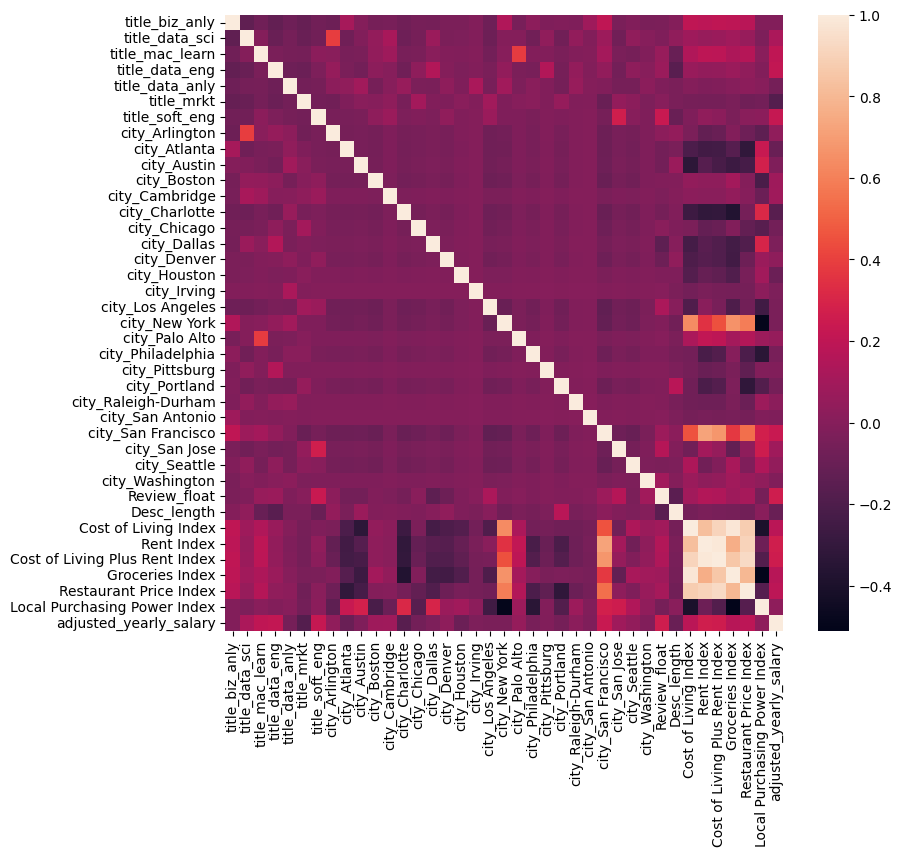

#### COLUMN CORRELATIONS AGAINST YEARLY SALARIES ####
title_biz_anly                   -0.009110
title_data_sci                    0.131136
title_mac_learn                   0.201687
title_data_eng                    0.212142
title_data_anly                  -0.059151
title_mrkt                       -0.173995
title_soft_eng                    0.224325
city_Arlington                    0.036516
city_Atlanta                     -0.098104
city_Austin                      -0.025242
city_Boston                       0.082451
city_Cambridge                    0.086175
city_Charlotte                   -0.165622
city_Chicago                     -0.061988
city_Dallas                      -0.030651
city_Denver                       0.030168
city_Houston                     -0.095132
city_Irving                      -0.028540
city_Los Angeles                 -0.041323
city_New York                    -0.041435
city_Palo Alto                    0.052157
city_Philadelphia                -0.047276


In [13]:
# The correlations of all presented columns
plt.figure(figsize=(9,8))
sns.heatmap(df_sub.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST YEARLY SALARIES ####")
print(df_sub.corr()['adjusted_yearly_salary'])

## Prepare Train and Test Sets

In [13]:
# Use 80% of the dataset as training, and 20% as testing
X = df_sub.drop(columns='adjusted_yearly_salary', axis=1)
Y = df_sub.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)

TRAIN SIZE: (770, 38) (770,)   TEST SIZE: (193, 38) (193,)


In [14]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [15]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [16]:
# Fit the training data into the linear reg. model, then make predictions on the test data
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [17]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [-7.16075335e+02  1.83673258e+04  3.51969209e+04  3.81018262e+04
 -2.74532572e+03 -1.94486484e+04  4.16140905e+04  1.20842151e+04
 -7.25718482e+02  1.75054946e+04  2.22716938e+04  2.21229938e+04
  6.62845775e+03  1.27350867e+03  1.16229711e+03  3.20335131e+04
 -1.91844357e+04 -2.04314272e+04  3.46107359e+03 -9.58775846e+03
 -1.00040839e+04  1.41022163e+04 -1.86270382e+04  6.67310612e+03
  1.27975108e+04 -9.04385576e+03  1.48982823e+04  1.92221432e+04
  1.26303289e+04 -1.17520965e+04  1.81922398e+04 -4.89642899e-01
 -1.02398196e+03  2.76600261e+02  6.23450671e+02  1.14264737e+03
 -9.46792428e+02  1.38833017e+02]
RANK: 32
INTERCEPT: 2036.970974119089


In [18]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  130409.59875981178 |  88400.0
  109019.06729277893 | 139512.5
  116134.48634545878 | 182500.0
    86047.7834324949 |  40560.0
    161138.596400971 | 150000.0
  148474.50746741297 | 105000.0
     168218.17272848 | 155000.0
   66549.14353120163 |  48000.0
   63800.70596942093 |  72800.0
   69179.40219306231 |  50000.0
   89697.93319435375 | 119600.0
  118468.02238330053 | 100000.0
   83639.66568138299 |  56241.5
  123480.13212450218 | 170560.0
   73428.05574945633 |  90253.5
  104613.82300903223 | 105000.0
   92957.47693161451 | 140400.0
   75186.78990262543 |  42935.0
     44568.092046965 |  87500.0
   81245.27125899502 |  66000.0


In [19]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1932704514.4289398
RMSE: 43962.53535032915
MAE: 32127.696262240534
R2 SCORE: 0.26054891108601397

# CROSS VALIDATION #
FITTING TIME: [0.00450611 0.00704718 0.00609112 0.00504541 0.00759649] -> 0.006057262420654297
SCORING TIME: [0.0030129  0.00303173 0.00199604 0.00200438 0.0010283 ] -> 0.002214670181274414
TRAIN SCORE: [0.34456297 0.26909634 0.28364016 0.27770996 0.31051062] -> 0.2971040101777459
TEST SCORE: [0.04904034 0.0932505  0.20743365 0.24510537 0.02194998] -> 0.12335596792423273


## 2 - Lasso Regression

In [20]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [21]:
# Fit the training data into the lasso model, then make predictions on the test data
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [22]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [-7.20017424e+02  1.83730459e+04  3.51989858e+04  3.80939604e+04
 -2.73964176e+03 -1.94278599e+04  4.16121268e+04  6.13036985e+03
 -1.47374576e+03  1.91024426e+04  2.34274485e+04  2.31983290e+04
 -1.00245882e+04 -4.30694993e+03  0.00000000e+00  2.04742323e+04
 -3.25765440e+04 -2.18648809e+04  1.09893167e+03 -8.84596317e+03
  6.50877584e+03  4.32595282e+03 -2.34015338e+04  2.82628655e+03
  1.54972548e+04 -1.60267736e+04  3.14839724e+04  2.53272464e+04
  1.21223045e+04 -7.67803454e+03  1.81861969e+04 -4.88673873e-01
  4.11476358e+02  4.71010565e+01 -1.63049060e+01  2.60685461e+00
 -1.99053459e+02 -1.10157909e+02]
INTERCEPT: 8839.241419834987
ITERATIONS: 1000


In [23]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   130376.0621424912 |  88400.0
  109005.89756399661 | 139512.5
  116138.35428093317 | 182500.0
   86058.48797219952 |  40560.0
   161104.2066316083 | 150000.0
  148446.69668735896 | 105000.0
  168188.33219153716 | 155000.0
   66529.15343826365 |  48000.0
  63836.622129292504 |  72800.0
   69174.94632603684 |  50000.0
   89665.71984746601 | 119600.0
  118467.02131264041 | 100000.0
    83708.5645526441 |  56241.5
  123473.34833185836 | 170560.0
   73441.18313750345 |  90253.5
   104596.1567676061 | 105000.0
   92944.92009790248 | 140400.0
   75201.01261715138 |  42935.0
   44693.84353360336 |  87500.0
   81260.97886162203 |  66000.0


In [24]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1932822315.1714818
RMSE: 43963.87511550229
MAE: 32129.50309452007
R2 SCORE: 0.26050384062299325

# CROSS VALIDATION #
FITTING TIME: [0.01901579 0.01358557 0.05619168 0.04707932 0.01400042] -> 0.02997455596923828
SCORING TIME: [0.00201988 0.00254083 0.00150681 0.00151587 0.00203276] -> 0.0019232273101806641
TRAIN SCORE: [0.34456154 0.26909531 0.2836394  0.27770917 0.31050952] -> 0.29710298805396196
TEST SCORE: [0.06707584 0.24949246 0.21722321 0.26909858 0.0419585 ] -> 0.1689697198224262


## 3 - Ridge Regression

In [25]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [26]:
# Fit the training data into the ridge model, then make predictions on the test data
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [27]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [-1.07995794e+03  1.79818894e+04  3.37045315e+04  3.71797215e+04
 -3.00598485e+03 -1.92636948e+04  4.06181517e+04  1.05023640e+04
 -2.69769585e+03  1.45756727e+04  2.01156506e+04  1.85883230e+04
  5.90792783e+03 -9.91084289e+02 -8.30024248e+02  2.91619693e+04
 -1.81364531e+04 -1.22139424e+04 -3.02964701e+02 -7.53636200e+03
 -9.67024948e+03  1.13896997e+04 -1.42963365e+04  3.28495197e+03
  9.35336668e+03 -6.58621338e+03  1.36803376e+04  1.63103917e+04
  1.23802839e+04 -9.80085633e+03  1.81727489e+04 -5.00104770e-01
 -8.54920008e+02  4.29879017e+02  5.24645675e+02  9.03454401e+02
 -1.19695922e+03  8.03731623e+01]
INTERCEPT: 33045.33651818505
ITERATIONS: None


In [28]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  129647.52120065202 |  88400.0
  108710.53979755104 | 139512.5
  116195.74340427485 | 182500.0
   85923.82699970549 |  40560.0
  160121.19334707124 | 150000.0
   147438.3503713058 | 105000.0
   166997.6229267377 | 155000.0
   66539.43951653414 |  48000.0
   64167.12122397272 |  72800.0
    69302.6626836302 |  50000.0
   89303.60111305595 | 119600.0
  118781.14014502773 | 100000.0
   85384.23191250936 |  56241.5
  123422.38421515461 | 170560.0
   73602.90108376188 |  90253.5
  104751.41501093033 | 105000.0
   92984.17467518595 | 140400.0
   75075.68930110821 |  42935.0
  47596.633596137544 |  87500.0
   81471.09701457058 |  66000.0


In [29]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1937133368.6475558
RMSE: 44012.87730480201
MAE: 32176.815631231322
R2 SCORE: 0.258854435262034

# CROSS VALIDATION #
FITTING TIME: [0.00301671 0.00252414 0.00300002 0.00299668 0.00150847] -> 0.0026092052459716795
SCORING TIME: [0.00201583 0.00099897 0.0015502  0.00200057 0.00201058] -> 0.001715230941772461
TRAIN SCORE: [0.34403057 0.26882684 0.28333652 0.27731721 0.31014966] -> 0.29673215893905036
TEST SCORE: [0.06828755 0.08513189 0.18378575 0.25861141 0.02517689] -> 0.12419869801278516


## 4 - Polynomial Regression

In [30]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [31]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(770, 780) (193, 780)


### Polynomial Regression with Lasso

In [32]:
lasso = Lasso()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)

In [33]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [ 0.00000000e+00  3.95808692e+01  9.32743318e+03  1.11063614e+03
  2.11393625e+04 -0.00000000e+00  0.00000000e+00  3.85973942e+03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.34404687e+04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.21411354e+04
  6.08221558e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.11667913e+04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.44972375e+04
 -1.94414348e+00  4.46642660e+02 -4.26185502e+00  1.43173401e+00
  4.87866222e+01 -7.32054791e+01  1.01442677e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77515851e+04
  5.29878984e+04 -2.36939047e+04  0.00000000e+00 -1.46169000e+04
 -2.90543742e+04 -4.06257994e+04  0.00000000e+00  3.04406198e+04
 -2.41163945e+04  0.00000000e+00  1.02551545e+04  0.00000000e+00
  0.00000000e+00  1.74643895e+04 -3.22003219e+04  0.00000000e+00
  2.12307014e+04  0

In [34]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 2089779364.9296286
RMSE: 45714.104660702134
MAE: 32384.116063367306
R2 SCORE: 0.20045220805841502

# CROSS VALIDATION #
FITTING TIME: [0.0115509  0.012568   0.0548358  0.04910111 0.01508188] -> 0.028627538681030275
SCORING TIME: [0.00198436 0.00102544 0.00102735 0.00219297 0.00101757] -> 0.0014495372772216797
TRAIN SCORE: [0.34456154 0.26909531 0.2836394  0.27770917 0.31050952] -> 0.29710298805396196
TEST SCORE: [0.06707584 0.24949246 0.21722321 0.26909858 0.0419585 ] -> 0.1689697198224262


### Polynomial Regression with Ridge

In [35]:
ridge = Ridge()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)

In [36]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [ 0.00000000e+00  2.56620422e+00  6.31762228e+00 -1.37515895e+00
  1.11508180e+00  4.37606894e+00 -1.05242073e+01  3.83620689e+00
 -7.22812046e-01 -5.15859243e-01  8.92727506e-01  3.69294635e-01
  1.76336458e+00  3.06205856e-01 -4.33182069e-01 -5.31962071e-01
  7.12853826e-01 -5.07404360e-01 -9.57315892e-02 -5.97114137e-01
  1.34894898e-01 -1.23383640e+00 -3.39353824e-01  2.23967191e+00
 -1.36554448e+00 -6.20426764e-01 -1.83457824e-02  7.92493687e-01
  7.73621115e-01 -1.49626450e-03  2.98732793e-01  1.22712299e+01
 -8.44273693e+00 -4.33298073e-02 -7.15717425e-01 -3.54763354e-01
 -3.76808673e-01 -1.58249390e+00  1.83666049e+00  2.56620422e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.19939751e+00
  8.87241888e+00  2.84467361e+01  0.00000000e+00 -9.55800989e+01
  7.79055349e+00  1.28652107e+00  0.00000000e+00  6.04974490e+01
  2.35140286e+00  0.00000000e+00  6.43199229e+01  0.00000000e+00
  0.00000000e+00  3.14525113e+01  3.72986784e+01  0.00000000e+00
 -2.64783451e+01  0

In [37]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 2868626895.156366
RMSE: 53559.56399333704
MAE: 35212.336983216584
R2 SCORE: -0.09753418873659503

# CROSS VALIDATION #
FITTING TIME: [0.00299978 0.00415707 0.00355482 0.00200057 0.00211072] -> 0.0029645919799804687
SCORING TIME: [0.00199628 0.00101233 0.00100827 0.00200033 0.00196934] -> 0.0015973091125488282
TRAIN SCORE: [0.34403057 0.26882684 0.28333652 0.27731721 0.31014966] -> 0.29673215893905036
TEST SCORE: [0.06828755 0.08513189 0.18378575 0.25861141 0.02517689] -> 0.12419869801278516


## 5 - Decision Tree Regression

In [38]:
dtree = DecisionTreeRegressor()
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
# Fit the training data into the decision tree, then make predictions on the test data
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [40]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

            125000.0 |  88400.0
            130186.0 | 139512.5
            102500.0 | 182500.0
             40560.0 |  40560.0
            145000.0 | 150000.0
            115050.0 | 105000.0
            175000.0 | 155000.0
             37500.0 |  48000.0
             26000.0 |  72800.0
             62500.0 |  50000.0
             91407.0 | 119600.0
             77500.0 | 100000.0
             75049.5 |  56241.5
             52800.0 | 170560.0
            109200.0 |  90253.5
             62400.0 | 105000.0
            160000.0 | 140400.0
            100000.0 |  42935.0
             33280.0 |  87500.0
             54080.0 |  66000.0


In [41]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 3044744571.188705
RMSE: 55179.20415508641
MAE: 36411.34196891192
R2 SCORE: -0.16491666047340536

# CROSS VALIDATION #
FITTING TIME: [0.00703073 0.00597978 0.0060215  0.0060401  0.00403547] -> 0.005821514129638672
SCORING TIME: [0.00152445 0.00100064 0.00099993 0.00199533 0.00200009] -> 0.0015040874481201173
TRAIN SCORE: [0.99999338 0.99999386 0.9999937  1.         0.99999359] -> 0.9999949066787519
TEST SCORE: [-0.75983383 -2.97767353 -1.03548076  0.04747605 -0.9232306 ] -> -1.1297485329984087


## 6 - Random Forest Regression

In [42]:
rforest = RandomForestRegressor()
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Fit the training data into the random forest, then make predictions on the test data
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [44]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  118876.00100000002 |  88400.0
  106871.81300000001 | 139512.5
           116139.12 | 182500.0
             78202.0 |  40560.0
            163751.6 | 150000.0
          108292.125 | 105000.0
            171800.0 | 155000.0
             94050.1 |  48000.0
             50609.6 |  72800.0
            82156.36 |  50000.0
             96410.2 | 119600.0
            101543.6 | 100000.0
            88136.49 |  56241.5
           94906.665 | 170560.0
            82883.24 |  90253.5
            91185.86 | 105000.0
          101484.884 | 140400.0
            80686.45 |  42935.0
           44537.544 |  87500.0
            81233.12 |  66000.0


In [45]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1780680044.7180183
RMSE: 42198.10475267839
MAE: 29429.430927461137
R2 SCORE: 0.3187133427567951

# CROSS VALIDATION #
FITTING TIME: [0.29434299 0.29825759 0.30573177 0.3105607  0.32108736] -> 0.30599608421325686
SCORING TIME: [0.00854254 0.00958061 0.00863481 0.00968885 0.00855923] -> 0.009001207351684571
TRAIN SCORE: [0.90900585 0.90864225 0.91506517 0.9074143  0.91975506] -> 0.9119765242126544
TEST SCORE: [ 0.10504085 -0.13253203  0.1826542   0.22860844  0.18403112] -> 0.11356051638836395


## 7 - KNN Regression

In [46]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
# Fit the training data into the KNN regression model, then make predictions on the test data
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)

In [48]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 38
FEATURE NAMES: ['title_biz_anly' 'title_data_sci' 'title_mac_learn' 'title_data_eng'
 'title_data_anly' 'title_mrkt' 'title_soft_eng' 'city_Arlington'
 'city_Atlanta' 'city_Austin' 'city_Boston' 'city_Cambridge'
 'city_Charlotte' 'city_Chicago' 'city_Dallas' 'city_Denver'
 'city_Houston' 'city_Irving' 'city_Los Angeles' 'city_New York'
 'city_Palo Alto' 'city_Philadelphia' 'city_Pittsburg' 'city_Portland'
 'city_Raleigh-Durham' 'city_San Antonio' 'city_San Francisco'
 'city_San Jose' 'city_Seattle' 'city_Washington' 'Review_float'
 'Desc_length' 'Cost of Living Index' 'Rent Index'
 'Cost of Living Plus Rent Index' 'Groceries Index'
 'Restaurant Price Index' 'Local Purchasing Power Index']
SAMPLES FIT: 770


In [49]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

             99442.0 |  88400.0
           112982.08 | 139512.5
            119032.3 | 182500.0
             88645.5 |  40560.0
             90292.0 | 150000.0
             61272.3 | 105000.0
             92400.0 | 155000.0
             78720.0 |  48000.0
           103418.56 |  72800.0
            88983.06 |  50000.0
             99320.0 | 119600.0
             79850.0 | 100000.0
            73884.56 |  56241.5
             84940.0 | 170560.0
            117240.0 |  90253.5
             81072.0 | 105000.0
             75992.0 | 140400.0
             56952.0 |  42935.0
             74700.0 |  87500.0
            142400.0 |  66000.0


In [50]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 2524767001.877969
RMSE: 50247.05963415142
MAE: 40045.49119170984
R2 SCORE: 0.03402631139173751

# CROSS VALIDATION #
FITTING TIME: [0.00199842 0.00199819 0.0042069  0.00100112 0.0010004 ] -> 0.002041006088256836
SCORING TIME: [0.01156902 0.00701714 0.00697541 0.00717187 0.00751805] -> 0.008050298690795899
TRAIN SCORE: [0.34069683 0.37055434 0.3414644  0.32211456 0.33219497] -> 0.34140501917297944
TEST SCORE: [-0.22840666 -0.51940528 -0.24487965 -0.01740829 -0.23323181] -> -0.2486663387939237


## 8 - Gradient Boosting

In [51]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)

In [53]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x22BFB63E440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x22BFB63E440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x22BFB63E440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x22BFB63E440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x22BFB63E440)]]
# OF ESTIMATORS: 100
# OF FEATURES: 38
MAX FEATURES: 38
FEATURE IMPORTANCES: [8.09953632e-03 4.91353615e-02 3.30643798e-02 5.66159313e-02
 8.14769493e-03 2.30095642e-02 5.39385726e-02 1.12691389e-02
 4.61192427e-04 2.84319011e-02 6.18241430e-04 0.0000000

In [54]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  114756.74079220908 |  88400.0
    89038.3643042905 | 139512.5
  101336.74835499871 | 182500.0
   71374.42935027083 |  40560.0
  168564.09818750486 | 150000.0
    114621.307647657 | 105000.0
   160689.7456451966 | 155000.0
  105728.80642537112 |  48000.0
   52529.52092467073 |  72800.0
   75371.65809222512 |  50000.0
   87778.49752328974 | 119600.0
  107380.11857786117 | 100000.0
    80997.4953094669 |  56241.5
  109590.14942282026 | 170560.0
    92209.4038893795 |  90253.5
  119693.19977084949 | 105000.0
   94460.23626287936 | 140400.0
  57930.806021828044 |  42935.0
  53609.599640994194 |  87500.0
   75573.90959035412 |  66000.0


In [55]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1783251616.3501506
RMSE: 42228.56398636059
MAE: 30015.019069762988
R2 SCORE: 0.31772946165681104

# CROSS VALIDATION #
FITTING TIME: [0.09463358 0.08747983 0.0878613  0.08789754 0.08761883] -> 0.08909821510314941
SCORING TIME: [0.00157213 0.00194526 0.00220323 0.00200224 0.00265384] -> 0.002075338363647461
TRAIN SCORE: [0.64342923 0.60762326 0.62580523 0.62352806 0.62568148] -> 0.6252134501055753
TEST SCORE: [ 0.14653297 -0.19722095  0.30398867  0.27074111  0.18142907] -> 0.14109417252389148


## 9 - XGBoost

In [56]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [57]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [58]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

      102642.7109375 |  88400.0
      124966.6484375 | 139512.5
       90218.0234375 | 182500.0
        54539.203125 |  40560.0
         149496.0625 | 150000.0
       86324.6015625 | 105000.0
        176448.09375 | 155000.0
      47514.60546875 |  48000.0
      57722.37890625 |  72800.0
       72939.8984375 |  50000.0
        80879.359375 | 119600.0
       98691.3515625 | 100000.0
       93830.0234375 |  56241.5
       76843.4140625 | 170560.0
         97630.71875 |  90253.5
      119180.9609375 | 105000.0
       108165.015625 | 140400.0
       71918.9609375 |  42935.0
      37568.77734375 |  87500.0
      63751.49609375 |  66000.0


In [59]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1563241844.1265075
RMSE: 39537.85330700831
MAE: 26822.120769915804
R2 SCORE: 0.40190501173594984

# CROSS VALIDATION #
FITTING TIME: [0.07766914 0.07512355 0.07376695 0.07110214 0.07429576] -> 0.07439150810241699
SCORING TIME: [0.00851941 0.00550675 0.00599957 0.0065136  0.00550866] -> 0.006409597396850586
TRAIN SCORE: [0.97886002 0.98303531 0.98181381 0.98168991 0.98494611] -> 0.9820690324194562
TEST SCORE: [-0.13816069 -0.00071491  0.20823676  0.1058279  -0.00591184] -> 0.033855440668252544


## Results of Metrics of All ML Models Together

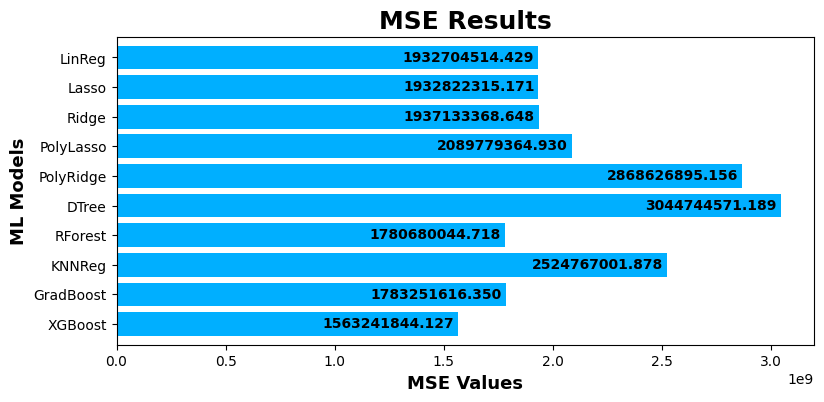

In [60]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'DTree', 'RForest', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i]-620000000, i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

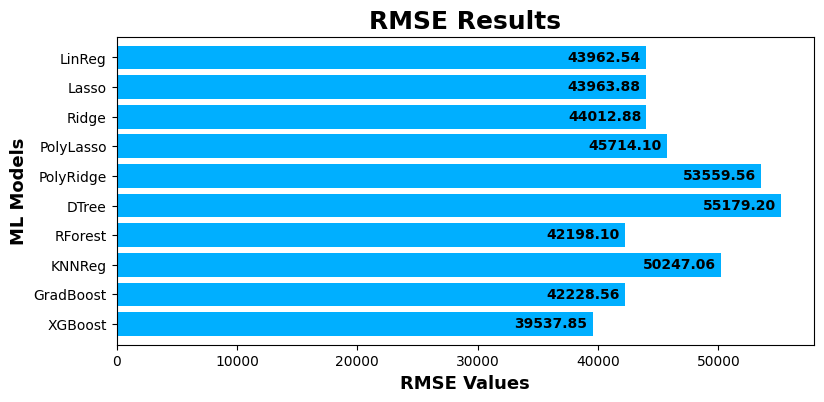

In [61]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i]-6500, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

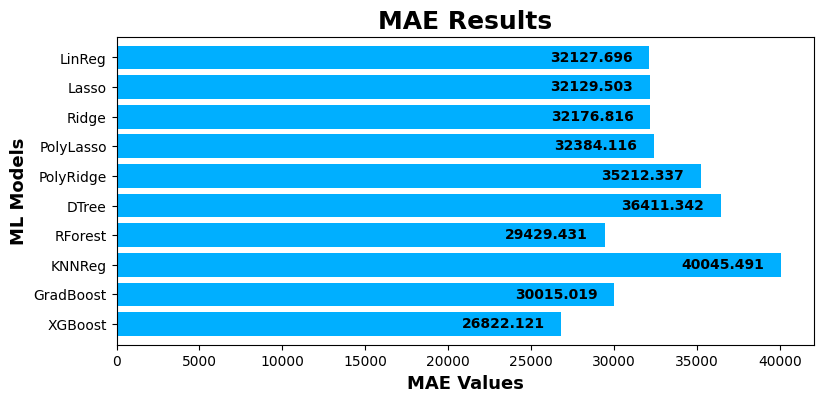

In [62]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i]-6000, i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

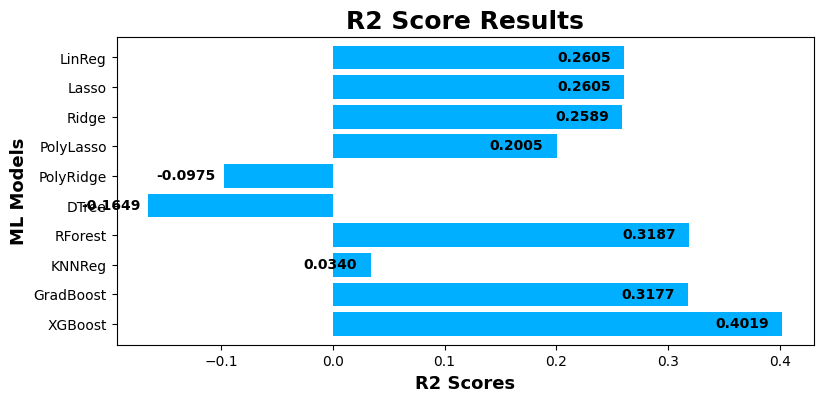

In [63]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

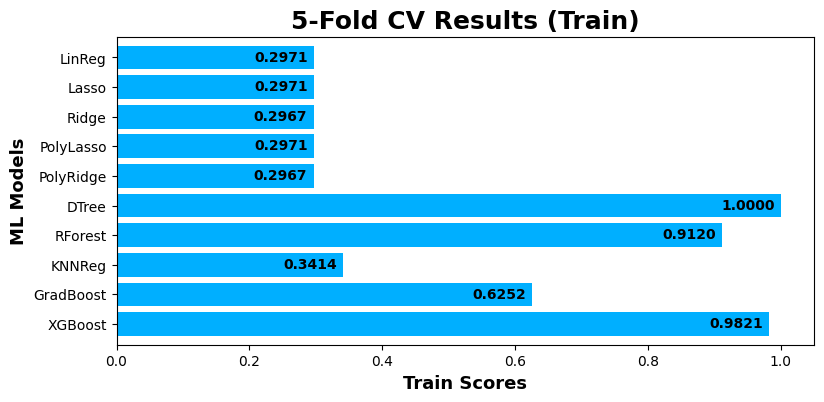

In [64]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.09, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

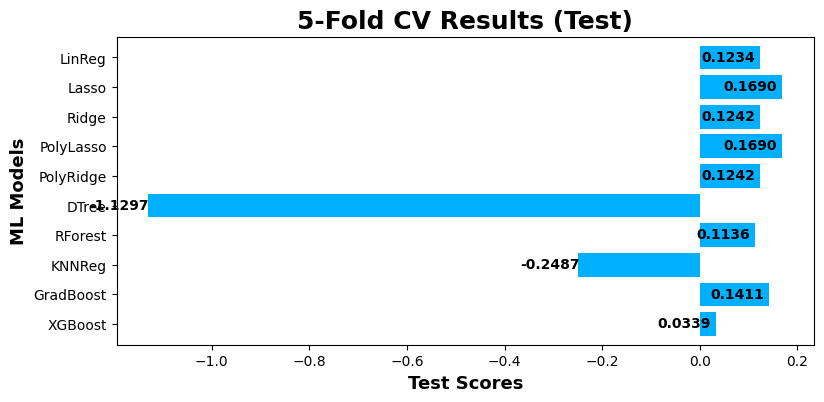

In [65]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.12, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()